## Automated Plant Phenotyping
### Context
##### Understanding how the genetics of plants interact with their environment to produce certain chateristics or 'phenotypes' is critical to understand how they might grow under different conditions. In relation to agriculture, extracting accurate data on pehnotype may help us to better manage plants to produce higher-yield, more resilient crops, and plan for future food security by predicting how crops may grow under various climate change scenarios.

##### State-of-the-art plant phenotyping platforms have recently been established in the UK, such as the [National Plant Phenomics Centre](https://www.plant-phenomics.ac.uk/) that collect high spatiotemporal resolution imagery of plants, as well as data on plant genetics and environmental conditions. However, extracting phenomic data from these images is expensive and time consuming to carry out manually. 

##### We are working with the NPPC to automate extraction of plant phenotype data from various datasets, one of which is comprised of time-series images of individual brassica napus plants. We want to track the change and emergence of different plant structures (such as leaves, flowers, branches and seed pods) over time. 

##### In this notebook we use the `scivision` Python API to load example plant data (at individual and satellite scale) and perform inference with `MapReader` model trained on NPPC images of individual brassica plants. `MapReader` (https://github.com/Living-with-machines/MapReader) is an end-to-end computer vision (CV) pipeline developed to analyse historical maps as scale, using a patch classification approach to to identify landscape features i.e. railways and buldings and examine change in these classes over time. The aim of the `mapreader-plant` model is to classify different parts of plants and track how they change over time in a similar fashion. 

## Load `scivision`
#### To start, let's load the core `scivision` modules relevant to this notebook

In [1]:
from scivision import default_catalog, load_pretrained_model, load_dataset
import matplotlib.pyplot as plt

## Retrieve `mapreader-plant` model from scivision catalog

In [12]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
stp_repo = models_catalog[models_catalog.name == "mapreader-plant"].url.item()
stp_repo # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/alan-turing-institute/mapreader-plant-scivision', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/mapreader-plant-scivision')

## Loading the `mapreader-plant` model

In [13]:
model = load_pretrained_model(stp_repo, allow_install=True)
model

[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1648652013/checkpoint.pkl
[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/model_checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1648652013/model_checkpoint.pkl
[INFO] Device is set to cpu


scivision.PretrainedModel( 
  module='mapreader-plant-scivision', 
  model='MapReader_model', 
  source='https://github.com/alan-turing-institute/mapreader-plant-scivision.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "path2images: str">)' 
)

## Load example data

#### In this case we want to load image data stored in an github respository that follows [this template](https://scivision.readthedocs.io/en/latest/model_repository_template.html) and is described with a `.scivision/data.yml` file

In [14]:
data_config = load_dataset('https://github.com/alan-turing-institute/mapreader-plant-scivision')
data_config

data:
  args:
    path: https://raw.githubusercontent.com/alan-turing-institute/mapreader-plant-scivision/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


#### We want to use the `plant_flower` data source listed in the `.scivision/data.yml`

### Retrieve `plant_flower` data in xarray format accepted by `mapreader-plant` model

In [15]:
plant_flower = data_config.plant_flower().to_dask()
plant_flower

<xarray.DataArray 'imread-7cc253a1a866b0b01aa25e6680cbae93' (concat_dim: 2,
                                                             y: 2056, x: 2454,
                                                             channel: 4)>
dask.array<imread, shape=(2, 2056, 2454, 4), dtype=uint8, chunksize=(1, 2056, 2454, 4), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 2049 2050 2051 2052 2053 2054 2055
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 2447 2448 2449 2450 2451 2452 2453
  * channel  (channel) int64 0 1 2 3
Dimensions without coordinates: concat_dim

### Plot image from loaded dataset

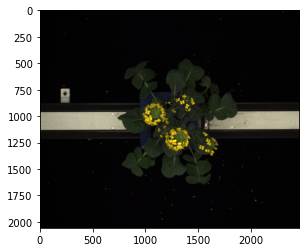

In [16]:
plt.imshow(plant_flower[1])

## Model predictions

#### Use `mapreader-plant` model to classify plant patches in example image

#### This model produces an image showing the label assigned to each patch, and table of confidence scores for label predictions

#### We add the additional argument `slice_size=25` to specify that we want to use smaller 25 by 25 pixel patches, which this version of `mapreader-plant` was trained on, rather than the default `mapreader` patch size of 100 by 100 pixels

Slicing mr_tmp_1648652013/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 8217 elements.
2022-03-30 14:58:58 plant-phen [INFO] infer_test -- 11/11 --     64/8217 (  0.8%) -- 
2022-03-30 14:59:25 plant-phen [INFO] infer_test -- 11/11 --    384/8217 (  4.7%) -- 
2022-03-30 14:59:52 plant-phen [INFO] infer_test -- 11/11 --    704/8217 (  8.6%) -- 
2022-03-30 15:00:18 plant-phen [INFO] infer_test -- 11/11 --   1024/8217 ( 12.5%) -- 
2022-03-30 15:00:43 plant-phen [INFO] infer_test -- 11/11 --   1344/8217 ( 16.4%) -- 
2022-03-30 15:01:08 plant-phen [INFO] infer_test -- 11/11 --   1664/8217 ( 20.3%) -- 
2022-03-30 15:01:33 plant-phen [INFO] infer_test -- 11/11 --   1984/8217 ( 24.1%) -- 
2022-03-30 15:01:58 plant-phen [INFO] infer_test -- 11/11 --   2304/8217 ( 28.0%) -- 
2022-03-30 15:02:23 plant-phen [INFO] infer_test -- 11/11 --   2624/8217 ( 31.9%) -- 
2022-03-30 15:02:48 plant-phen [INFO] infer_test -- 11/11 --   2944/8217 ( 35.8%) -- 
2

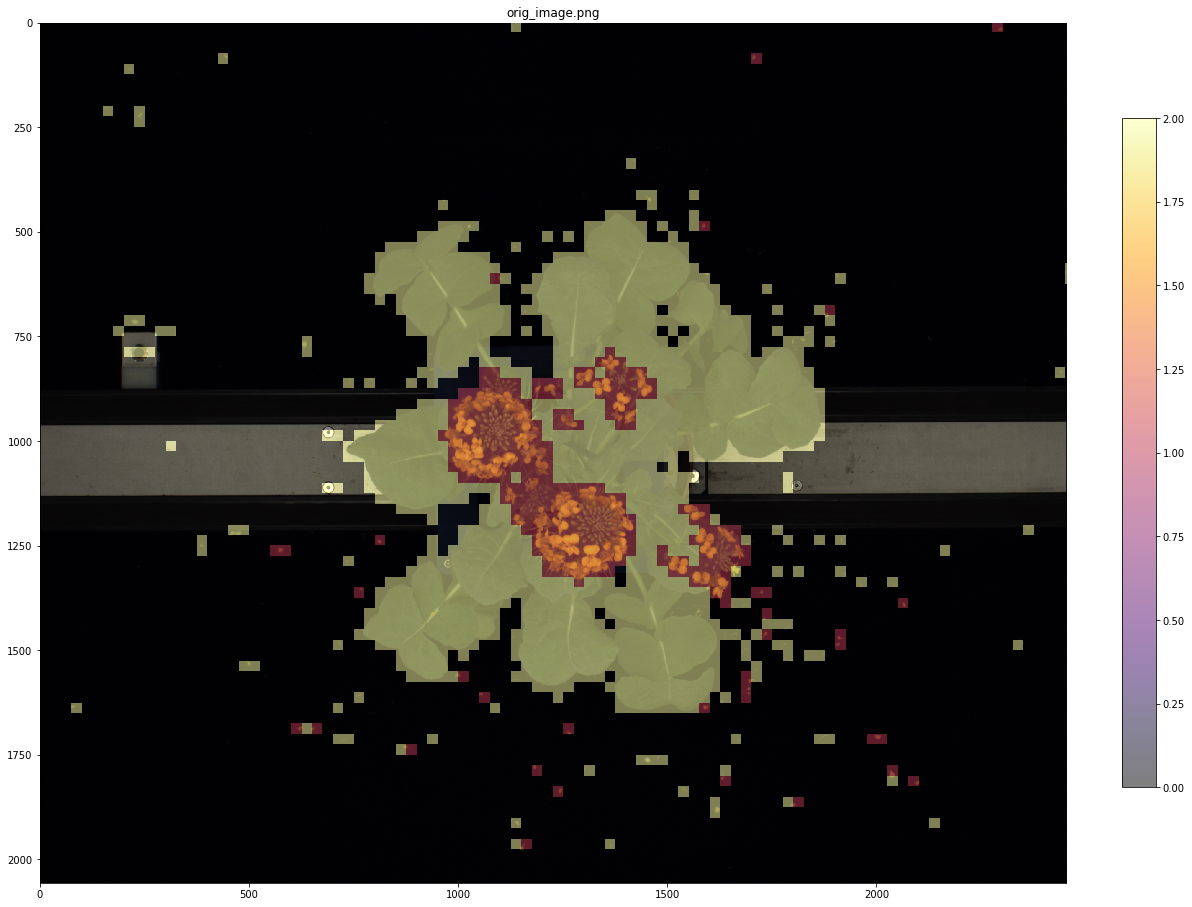

,image_path,pred,conf,name
0,/home/ecorcoran/plant-phenotyping-classificati...,0,0.992225,patch-0-0-25-25-#orig_image.png#.PNG
1,/home/ecorcoran/plant-phenotyping-classificati...,0,0.991854,patch-25-0-50-25-#orig_image.png#.PNG
2,/home/ecorcoran/plant-phenotyping-classificati...,0,0.993548,patch-50-0-75-25-#orig_image.png#.PNG
3,/home/ecorcoran/plant-phenotyping-classificati...,2,0.999802,patch-925-1425-950-1450-#orig_image.png#.PNG
4,/home/ecorcoran/plant-phenotyping-classificati...,0,0.992651,patch-100-0-125-25-#orig_image.png#.PNG
...,...,...,...,...
8212,/home/ecorcoran/plant-phenotyping-classificati...,0,0.992572,patch-1450-2000-1475-2025-#orig_image.png#.PNG
8213,/home/ecorcoran/plant-phenotyping-classificati...,0,0.981943,patch-1475-2000-1500-2025-#orig_image.png#.PNG
8214,/home/ecorcoran/plant-phenotyping-classificati...,0,0.989567,patch-1500-2000-1525-2025-#orig_image.png#.PNG
8215,/home/ecorcoran/plant-phenotyping-classificati...,0,0.994336,patch-1525-2000-1550-2025-#orig_image.png#.PNG


In [17]:
model.predict(plant_flower[1], slice_size=25)

## Let's try the `mapreader-plant` model on some new and different data!

#### Query `scivision` catalog for compatible datasources

In [18]:
compatible_datasources = default_catalog.compatible_datasources("mapreader-plant").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
0,data-000,None,"(TaskEnum.object_detection, TaskEnum.segmentat...","(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,True,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,data-001,None,"(TaskEnum.segmentation, TaskEnum.thresholding,...","(multispectral, hyperspectral)",https://gitlab.au.dk/AUENG-Vision/OPPD/-/archi...,image,True,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
2,data-002,None,"(TaskEnum.classificiation,)","(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,True,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection,)","(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,True,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


#### We will load data from the vegetation edge detection use case (https://github.com/scivision-gallery/coastalveg-edge-detection)

In [19]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-005']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [20]:
data_url = target_datasource['url'].item()

In [21]:
data_config = load_dataset(data_url)
data_config

data:
  args:
    path: https://raw.githubusercontent.com/MartinSJRogers/VEdge_Detector_scivision/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


#### we will use the `sample_image` data source from the `scivision/data.yml`

In [22]:
sample_image = data_config.sample_image(sample_image="winterton").to_dask()
sample_image

<xarray.DataArray (y: 1600, x: 1000, channel: 4)>
dask.array<xarray-<this-array>, shape=(1600, 1000, 4), dtype=uint8, chunksize=(1600, 1000, 4), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1593 1594 1595 1596 1597 1598 1599
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999
  * channel  (channel) int64 0 1 2 3

#### Plot the example image

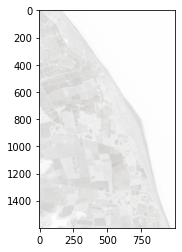

In [23]:
plt.imshow(sample_image)

#### Predict whether 25 x 25 pixel patches in example image contain background (label = 0), flower (label = 1), or non-flower plant structures (label = 2)

In [24]:
model = load_pretrained_model(stp_repo, allow_install=True)
model

[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1648653088/checkpoint.pkl
[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/model_checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1648653088/model_checkpoint.pkl
[INFO] Device is set to cpu


scivision.PretrainedModel( 
  module='mapreader-plant-scivision', 
  model='MapReader_model', 
  source='https://github.com/alan-turing-institute/mapreader-plant-scivision.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "path2images: str">)' 
)

Slicing mr_tmp_1648653088/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 2560 elements.
2022-03-30 15:13:04 plant-phen [INFO] infer_test -- 11/11 --     64/2560 (  2.5%) -- 
2022-03-30 15:13:30 plant-phen [INFO] infer_test -- 11/11 --    384/2560 ( 15.0%) -- 
2022-03-30 15:13:55 plant-phen [INFO] infer_test -- 11/11 --    704/2560 ( 27.5%) -- 
2022-03-30 15:14:20 plant-phen [INFO] infer_test -- 11/11 --   1024/2560 ( 40.0%) -- 
2022-03-30 15:14:45 plant-phen [INFO] infer_test -- 11/11 --   1344/2560 ( 52.5%) -- 
2022-03-30 15:15:10 plant-phen [INFO] infer_test -- 11/11 --   1664/2560 ( 65.0%) -- 
2022-03-30 15:15:35 plant-phen [INFO] infer_test -- 11/11 --   1984/2560 ( 77.5%) -- 
2022-03-30 15:16:00 plant-phen [INFO] infer_test -- 11/11 --   2304/2560 ( 90.0%) -- 
Total time: 3m 21s


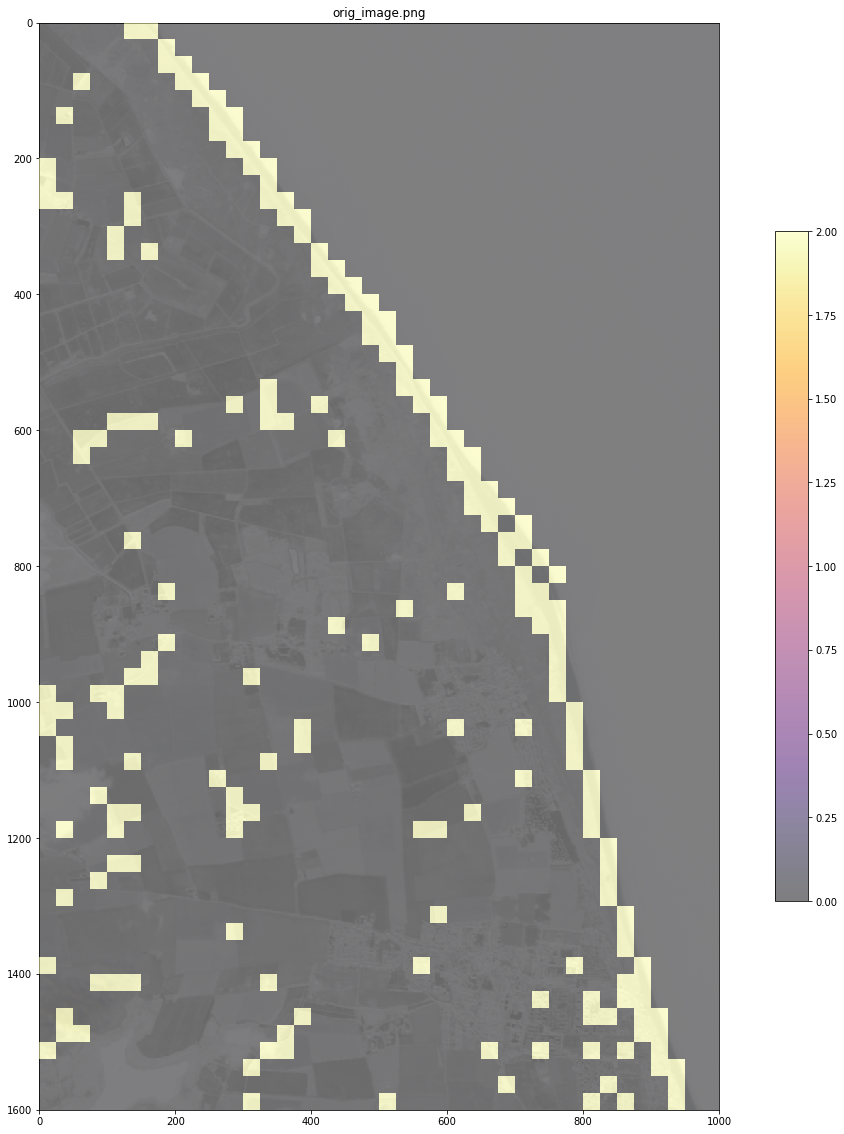

,image_path,pred,conf,name
0,/home/ecorcoran/plant-phenotyping-classificati...,0,0.997385,patch-0-0-25-25-#orig_image.png#.PNG
1,/home/ecorcoran/plant-phenotyping-classificati...,2,0.569306,patch-375-1025-400-1050-#orig_image.png#.PNG
2,/home/ecorcoran/plant-phenotyping-classificati...,0,0.997880,patch-50-0-75-25-#orig_image.png#.PNG
3,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998217,patch-75-0-100-25-#orig_image.png#.PNG
4,/home/ecorcoran/plant-phenotyping-classificati...,0,0.979705,patch-100-0-125-25-#orig_image.png#.PNG
...,...,...,...,...
2555,/home/ecorcoran/plant-phenotyping-classificati...,0,0.618677,patch-875-1575-900-1600-#orig_image.png#.PNG
2556,/home/ecorcoran/plant-phenotyping-classificati...,0,0.942756,patch-900-1575-925-1600-#orig_image.png#.PNG
2557,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998645,patch-925-1025-950-1050-#orig_image.png#.PNG
2558,/home/ecorcoran/plant-phenotyping-classificati...,2,0.933039,patch-350-275-375-300-#orig_image.png#.PNG


In [25]:
model.predict(sample_image, slice_size=25)

### Use the same pre-trained `mapreader-plant` model, but change patch size to 10 x 10 pixels

Slicing mr_tmp_1648653088/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 18560 elements.
2022-03-30 15:18:32 plant-phen [INFO] infer_test -- 11/11 --    64/18560 (  0.3%) -- 
2022-03-30 15:18:57 plant-phen [INFO] infer_test -- 11/11 --   384/18560 (  2.1%) -- 
2022-03-30 15:19:22 plant-phen [INFO] infer_test -- 11/11 --   704/18560 (  3.8%) -- 
2022-03-30 15:19:47 plant-phen [INFO] infer_test -- 11/11 --  1024/18560 (  5.5%) -- 
2022-03-30 15:20:12 plant-phen [INFO] infer_test -- 11/11 --  1344/18560 (  7.2%) -- 
2022-03-30 15:20:36 plant-phen [INFO] infer_test -- 11/11 --  1664/18560 (  9.0%) -- 
2022-03-30 15:21:01 plant-phen [INFO] infer_test -- 11/11 --  1984/18560 ( 10.7%) -- 
2022-03-30 15:21:26 plant-phen [INFO] infer_test -- 11/11 --  2304/18560 ( 12.4%) -- 
2022-03-30 15:21:50 plant-phen [INFO] infer_test -- 11/11 --  2624/18560 ( 14.1%) -- 
2022-03-30 15:22:15 plant-phen [INFO] infer_test -- 11/11 --  2944/18560 ( 15.9%) -- 


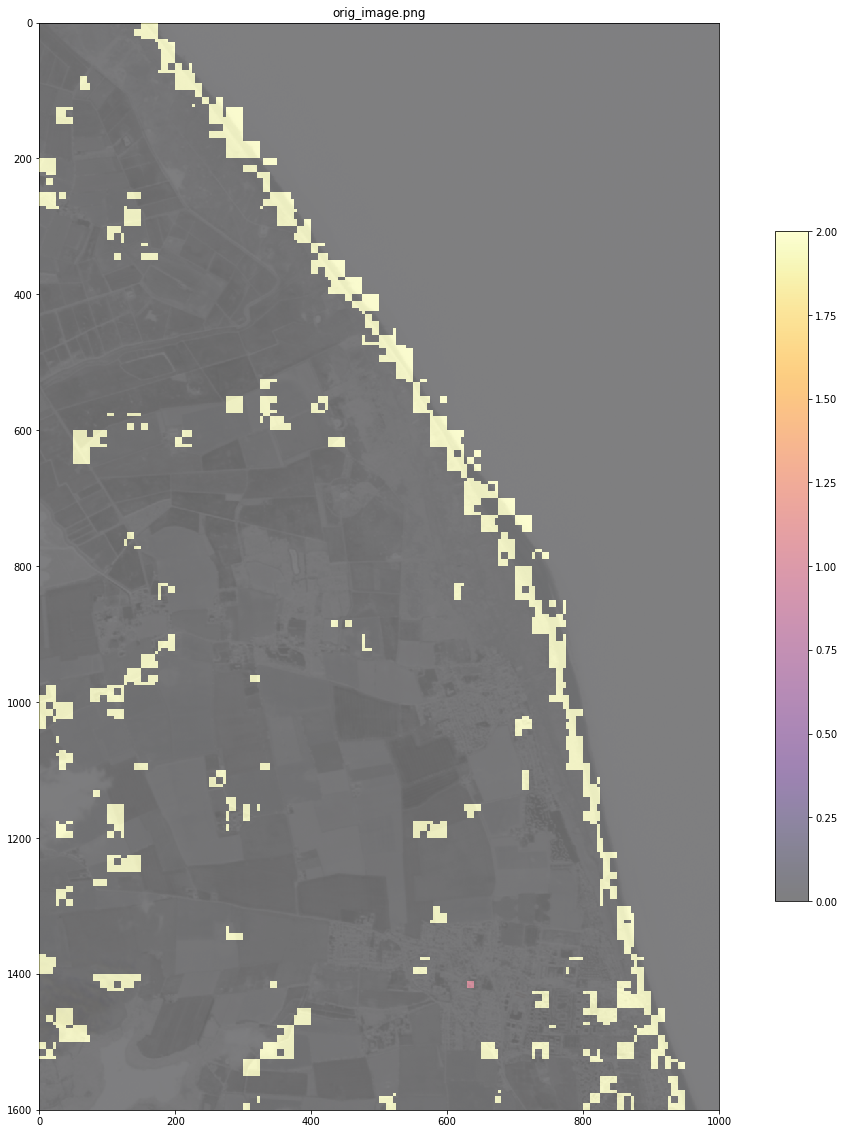

,image_path,pred,conf,name
0,/home/ecorcoran/plant-phenotyping-classificati...,0,0.995644,patch-750-1300-760-1310-#orig_image.png#.PNG
1,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998340,patch-600-650-610-660-#orig_image.png#.PNG
2,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998286,patch-925-1425-950-1450-#orig_image.png#.PNG
3,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998391,patch-600-120-610-130-#orig_image.png#.PNG
4,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998312,patch-730-630-740-640-#orig_image.png#.PNG
...,...,...,...,...
18555,/home/ecorcoran/plant-phenotyping-classificati...,2,0.933039,patch-350-275-375-300-#orig_image.png#.PNG
18556,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998547,patch-460-1250-470-1260-#orig_image.png#.PNG
18557,/home/ecorcoran/plant-phenotyping-classificati...,0,0.998515,patch-620-380-630-390-#orig_image.png#.PNG
18558,/home/ecorcoran/plant-phenotyping-classificati...,0,0.962991,patch-775-1550-800-1575-#orig_image.png#.PNG


In [26]:
model.predict(sample_image, slice_size=10)